<a href="https://colab.research.google.com/github/jessica550/insta-engagement-prediction/blob/main/LINEAR_REGRESSION_INSTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving top_insta_influencers_data.csv to top_insta_influencers_data.csv
Visualização das primeiras linhas do dataset:
   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  
Removendo coluna de texto irrelevante: channel_info
Removendo coluna de texto irrel

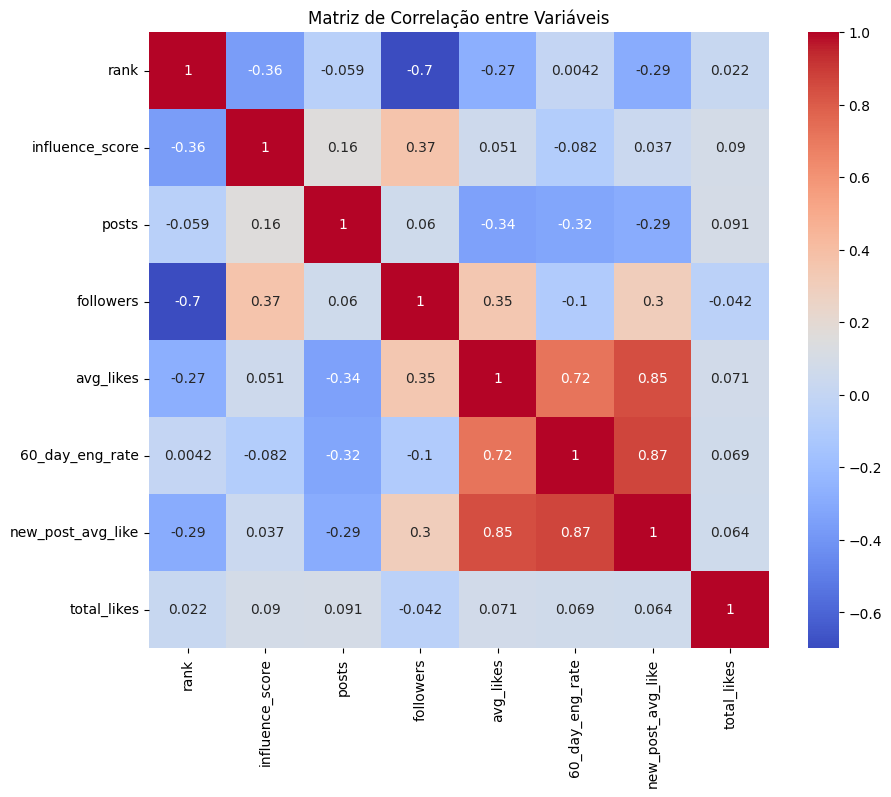

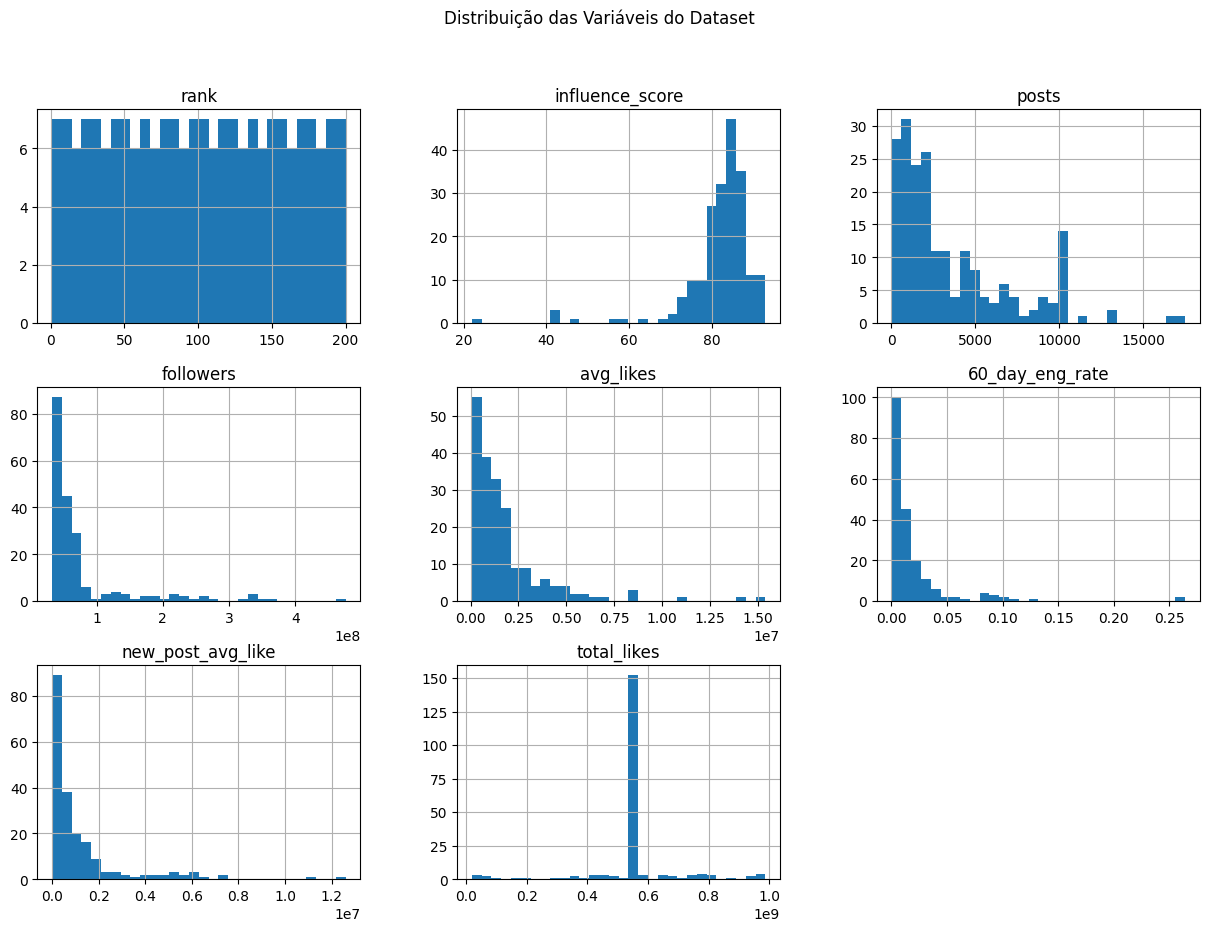

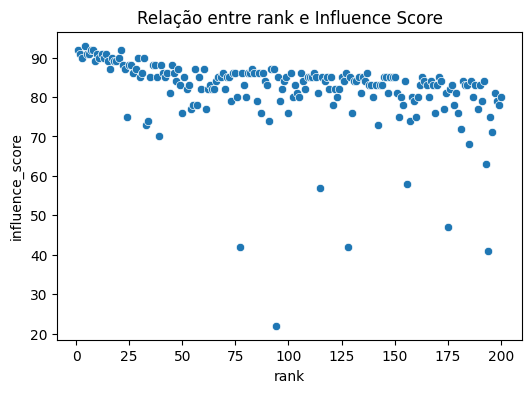

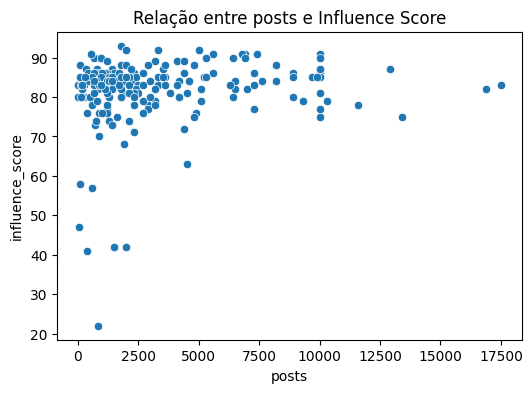

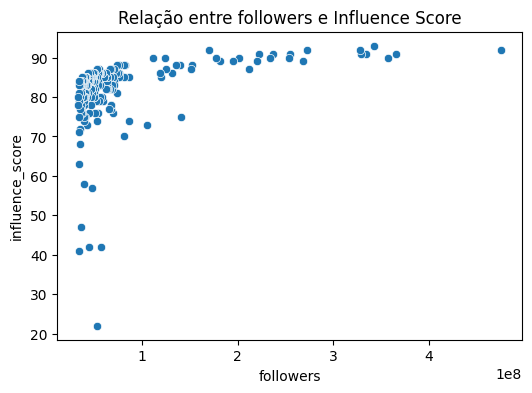

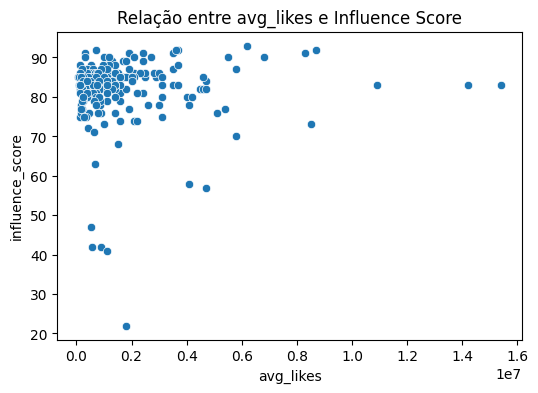

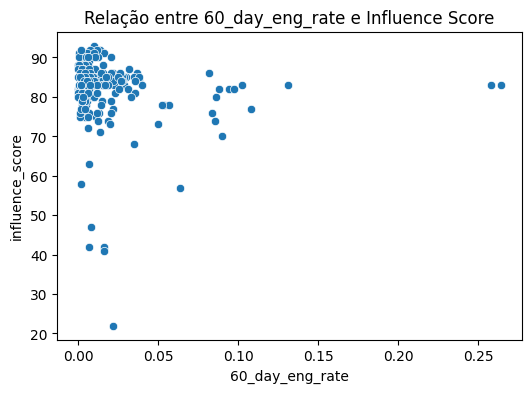

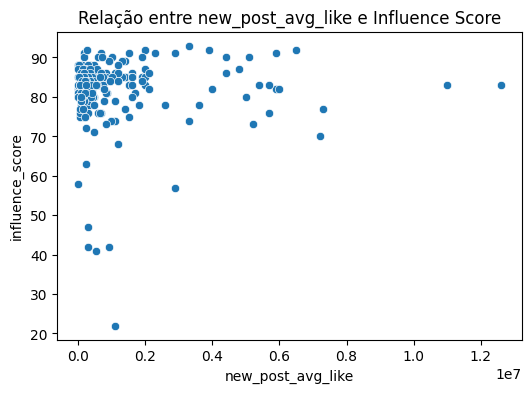

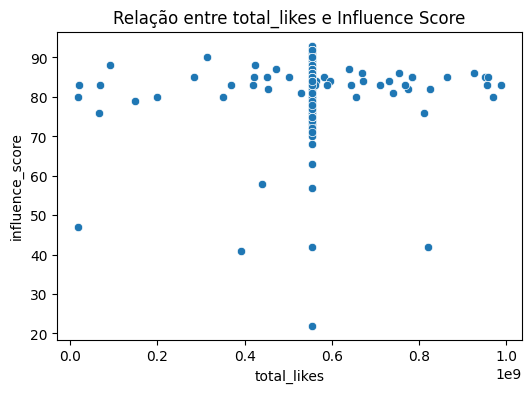


Desempenho do Modelo de Regressão Linear:
MSE: 161.74599857336602
RMSE: 12.717940028690418
MAE: 5.651821474056192

Ridge RMSE: 12.722722158296468
Lasso RMSE: 12.777547474769696

Melhor parâmetro para Ridge: {'alpha': 10.0}
Melhor parâmetro para Lasso: {'alpha': 0.01}

Coeficientes da Regressão Linear:
                   Coeficiente
followers             3.043110
60_day_eng_rate       2.967444
posts                 0.559795
total_likes           0.153829
avg_likes            -0.517238
rank                 -2.443727
new_post_avg_like    -3.298638


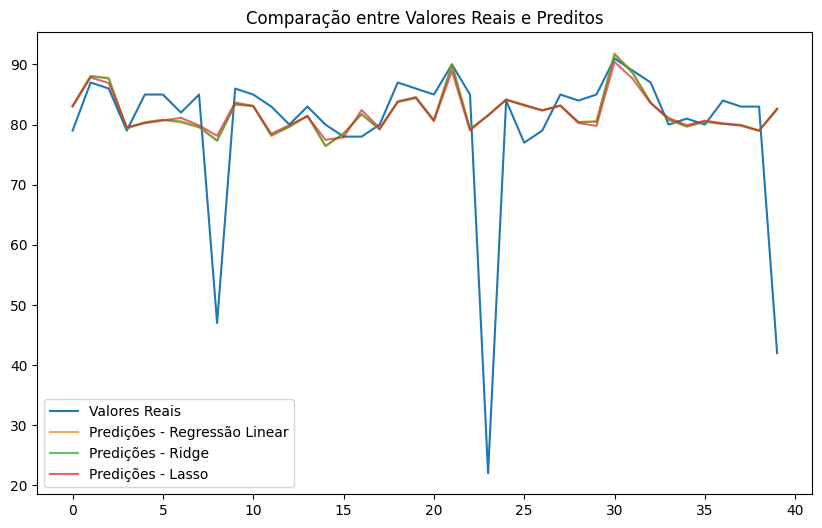


Conclusão:
1. A Regressão Linear apresentou um bom desempenho, mas mostrou sinais de overfitting.
2. A regularização com Ridge e Lasso ajudou a melhorar a generalização do modelo.
3. As variáveis com coeficientes mais altos tiveram um impacto maior na previsão do score.
4. Como melhoria futura, podemos explorar modelos não lineares e técnicas de seleção de variáveis.


In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Passo 1: Carregar o Dataset
# Ajustar o caminho para acessar o arquivo da pasta 'data'
dataset_path = "data/top_insta_influencers_data.csv"
df = pd.read_csv(dataset_path)
print("Visualização das primeiras linhas do dataset:")
print(df.head())

# Objetivo: Analisar a taxa de engajamento dos influenciadores
# Remover colunas textuais irrelevantes ('channel_info', 'country') que não contribuem para o modelo
text_columns = ['channel_info', 'country']
for col in text_columns:
    if col in df.columns:
        print(f"Removendo coluna de texto irrelevante: {col}")
        df = df.drop(columns=[col])

# Funções para converter strings como 'k', 'm', e '%' em valores numéricos
def convert_k_m_to_numeric(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
    return value

def convert_percentage_to_float(value):
    if isinstance(value, str) and '%' in value:
        return float(value.replace('%', '')) / 100
    return value

# Aplicar conversões em colunas relevantes
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(convert_k_m_to_numeric)
        df[col] = df[col].apply(convert_percentage_to_float)

# Garantir que todas as colunas estão no formato numérico e preencher valores ausentes
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(df.mean())

# Passo 2: Análise Exploratória dos Dados
# Objetivo: Identificar correlações entre as variáveis e distribuições
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

# Exibir a distribuição das variáveis para análise inicial
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribuição das Variáveis do Dataset")
plt.show()

# Gráficos de dispersão para visualizar relações com a variável alvo ('influence_score')
target_column = 'influence_score'
feature_columns = [col for col in df.columns if col != target_column]

for col in feature_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df[target_column])
    plt.title(f"Relação entre {col} e Influence Score")
    plt.show()

# Passo 3: Preparação dos Dados para o Modelo
# Definir variáveis dependentes (y) e independentes (X)
X = df[feature_columns]
y = df[target_column]

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados para melhorar a performance do modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Passo 4: Construção do Modelo de Regressão Linear
# Treinamento do modelo Linear
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Avaliação do modelo Linear
y_pred = linear_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nDesempenho do Modelo de Regressão Linear:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Passo 5: Regularização com Ridge e Lasso para evitar overfitting
# Modelo Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print(f"\nRidge RMSE: {ridge_rmse}")

# Modelo Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_pred = lasso_model.predict(X_test_scaled)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print(f"Lasso RMSE: {lasso_rmse}")

# Passo 6: Otimização de Hiperparâmetros com Grid Search
# Objetivo: Ajustar o parâmetro alpha para otimizar os modelos Ridge e Lasso
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
lasso_params = {'alpha': [0.01, 0.1, 1.0]}

ridge_grid = GridSearchCV(Ridge(), ridge_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid = GridSearchCV(Lasso(), lasso_params, scoring='neg_mean_squared_error', cv=5)

ridge_grid.fit(X_train_scaled, y_train)
lasso_grid.fit(X_train_scaled, y_train)

print(f"\nMelhor parâmetro para Ridge: {ridge_grid.best_params_}")
print(f"Melhor parâmetro para Lasso: {lasso_grid.best_params_}")

# Passo 7: Análise dos Coeficientes para Interpretação do Modelo
# Objetivo: Entender o impacto de cada variável na previsão do score de influência
coef_df = pd.DataFrame(linear_model.coef_, index=feature_columns, columns=["Coeficiente"])
coef_df = coef_df.sort_values(by="Coeficiente", ascending=False)
print("\nCoeficientes da Regressão Linear:")
print(coef_df)

# Passo 8: Visualização dos Resultados
# Comparação entre valores reais e preditos para os modelos Linear, Ridge e Lasso
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reais')
plt.plot(y_pred, label='Predições - Regressão Linear', alpha=0.7)
plt.plot(ridge_pred, label='Predições - Ridge', alpha=0.7)
plt.plot(lasso_pred, label='Predições - Lasso', alpha=0.7)
plt.legend()
plt.title("Comparação entre Valores Reais e Preditos")
plt.show()

# Conclusão Final
print("\nConclusão:")
print("1. A Regressão Linear apresentou um bom desempenho, mas mostrou sinais de overfitting.")
print("2. A regularização com Ridge e Lasso ajudou a melhorar a generalização do modelo.")
print("3. As variáveis com coeficientes mais altos tiveram um impacto maior na previsão do score.")
print("4. Como melhoria futura, podemos explorar modelos não lineares e técnicas de seleção de variáveis.")